In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [ ]:
# n_instance = 10
# n_agents = 2
# actions_space = np.arange(1.2, 2.0, 0.04) # AER paper uses (1.4, 2.0, 0.04)
# n_actions = actions_space.size
# state_ravel = (n_actions,)*n_agents

In [ ]:
# quality = np.ones(n_agents)*2
# margin_cost = np.ones(n_agents)
# horizon = 1/4
# a0 = 0
# def replay_classic_reward(action):
#     # Compute profits for all agents
#     price = actions_space[action]
#     demand = np.exp((quality - price) / horizon)
#     demand = demand / (np.sum(demand) + np.exp(a0 / horizon))
#     reward = np.multiply(price - margin_cost, demand)
#     return reward

In [ ]:
# with open('AER_ratio.pickle', 'rb') as fp:
#     AER_ratio = pickle.load(fp)

# with open('AERNoisy_Q.pickle', 'rb') as fp:
#     AERNoisy_Q = pickle.load(fp)

In [ ]:
# with open('noisy_Q.pickle', 'rb') as fp:
#     noisy_Q = pickle.load(fp)

In [ ]:
# N = 200000
# monopoly = replay_classic_reward([18, 18])[0]
# nash = replay_classic_reward([7, 7])[0]

# # For AER paper
# monopoly = replay_classic_reward([13, 13])[0]
# nash = replay_classic_reward([2, 2])[0]

# ratio = np.zeros((n_instance, n_instance))

# ss = np.random.SeedSequence(12345)
# # Last a few rngs for sampling memories
# child_seeds = ss.spawn(n_agents)
# rng = [np.random.default_rng(s) for s in child_seeds]

# for agent0 in range(n_instance):
#     for agent1 in range(n_instance):
#         sim_Q = np.zeros((n_agents, n_actions**n_agents, n_actions))
#         sim_Q[0, :, :] = noisy_Q[agent0][0, :, :]
#         sim_Q[1, :, :] = noisy_Q[agent1][1, :, :]
# #         state = [7, 7]
#         init = np.zeros(n_agents, dtype=int)
#         for i in range(n_agents):
#             init[i] = rng[i].integers(0, n_actions, size=1)
#         state = np.ravel_multi_index(init, state_ravel)

#         action = np.zeros(n_agents, dtype=int)
#         reward = np.zeros(n_agents)
#         for k in range(N):
#             # For each agent, select and perform an action
#             for i in range(n_agents):
#                 action[i] = sim_Q[i, state].argmax()
#             if k > N - 10000:
#                 reward += replay_classic_reward(action)
#             # Move to the next state
#             state = np.ravel_multi_index(action, state_ravel)
#             avg = np.sum(reward)/10000/n_agents
#             ratio[agent0, agent1] = (avg - nash)/(monopoly - nash)
#         print('Instance', agent0, 'vs', agent1, avg, 'ratio', ratio[agent0, agent1])

In [ ]:
# ratio.diagonal()

In [2]:
# LAM = 1/MEM_SIZE/0.05 Simulated Ratio
tol = np.array([0.75023822, 0.93250101, 0.93591032, 0.41974075, 0.90971576,
                0.92656322, 0.73407456, 0.84459248, 0.98900363, 0.84945931])

# tol_Noisy LAM = 1/MEM_SIZE/0.05 Simulated Ratio
tol_Noisy = np.array([0.85665173, 0.80733041, 0.79650658, 0.75549292, 0.46190127,
                      0.98267348, 0.69073229, 0.72956276, 0.64223285, 0.87104759])

# Indif (AER)
AER = np.array([0.62075367, 0.87099466, 0.61114998, 0.52129677, 0.46779278,
                0.83529688, 0.53940583, 0.46263388, 0.74909819, 0.61351567])

AER_Noisy = np.array([0.47497263, 0.74768226, 0.68977372, 0.75170507, 0.92656322,
                      0.40764159, 0.55472267, 0.69038107, 0.50024627, 0.64776956])

df1 = pd.DataFrame({'Ratio':AER, 'Case':['Indif']*10})
df2 = pd.DataFrame({'Ratio':AER_Noisy, 'Case':['Indif Noisy']*10})
df3 = pd.DataFrame({'Ratio':tol, 'Case': ['Tolerant']*10})
df4 = pd.DataFrame({'Ratio':tol_Noisy, 'Case': ['Tolerant Noisy']*10})
frames = [df1, df2, df3, df4]
df = pd.concat(frames)

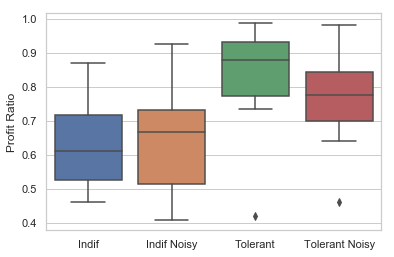

In [3]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Case', y='Ratio', data=df)
ax.set_xlabel('') # , fontsize=14)
ax.set_ylabel("Profit Ratio")
# plt.savefig('noisy.eps', format='eps', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()